In [184]:
#Compare runtime of drama vs comedy movie distributions, imdb dataset
import pandas as pd
import random

#Get random data from 1% of the file
readProportion = 0.01
data = pd.read_table('https://datasets.imdbws.com/title.basics.tsv.gz',
                    header=0, skiprows=lambda i: i > 0 and random.random() > readProportion,
                    sep='\t')
data = data.sample(frac=1)
#Rids empty entries
dataFull = data[data.runtimeMinutes != r'\N'].copy()
#Converts runtime minutes from string to int
dataFull.loc[:, 'runtimeMinutes'] = dataFull.runtimeMinutes.astype(int)
#Movies, ignoring outliers
movies = dataFull[(dataFull.titleType == 'movie') & (dataFull.runtimeMinutes < 400)]

In [185]:
#Filtering dramas
drama = movies[movies.genres.str.contains('Drama')]

In [186]:
#Filtering comedies
comedy = movies[movies.genres.str.contains('Comedy')]

Drama mean runtime: 94.07766990291262
Comedy mean runtime: 93.30923694779116


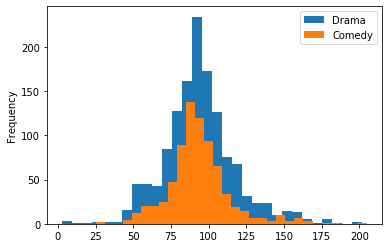

In [203]:
#Plot series as histograms
dramaMins = drama.runtimeMinutes.copy()
comedyMins = comedy.runtimeMinutes.copy()
#both = pd.concat([dramaMins, comedyMins],ignore_index=True, axis=1)
dramaMins.plot.hist(bins=30, label='Drama', legend=True)
comedyMins.plot.hist(bins=30, label='Comedy', legend=True)
print('Drama mean runtime:', dramaMins.mean())
print('Comedy mean runtime:', comedyMins.mean())

In [196]:
#Filtering only dramas
dramaOnly = movies[movies.genres == 'Drama']

In [197]:
#Filtering only comedies
comedyOnly = movies[movies.genres == 'Comedy']

Drama only mean runtime: 94.5877034358047
Comedy only mean runtime: 93.53763440860214


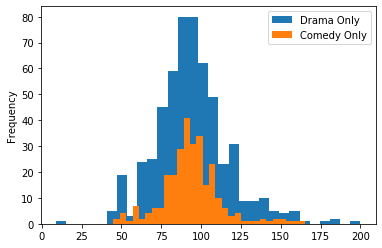

In [202]:
#Plot series as histograms
dramaOnlyMins = dramaOnly.runtimeMinutes.copy()
comedyOnlyMins = comedyOnly.runtimeMinutes.copy()
#both = pd.concat([dramaMins, comedyMins],ignore_index=True, axis=1)
dramaOnlyMins.plot.hist(bins=30, label='Drama Only', legend=True)
comedyOnlyMins.plot.hist(bins=30, label='Comedy Only', legend=True)
print('Drama only mean runtime:', dramaOnlyMins.mean())
print('Comedy only mean runtime:', comedyOnlyMins.mean())